# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Задание:" data-toc-modified-id="Задание:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание:</a></div>

# Задание:
    Реализовать модель логистической регрессии с использованием pytorch
    Тестовый набор данных выбирается самостоятельно

http://pytorch.org/

https://github.com/pytorch/examples

http://pytorch.org/tutorials/

In [93]:
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from math import floor

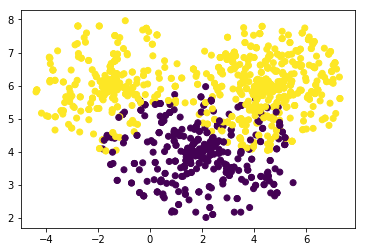

In [170]:
data = pd.read_csv('dataset1.csv', sep = '\t')
plt.scatter(data.F1, data.F2, c=data['T'])
plt.show()
data = np.array(data)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(data[:,:-1], data[:,-1:], train_size = 0.7, random_state = 7)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


LR score = 0.965998225377


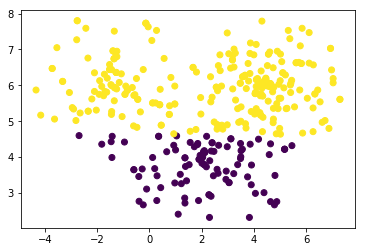

In [182]:
lr = LogisticRegression(random_state = 3).fit(X_train, np.ravel(y_train))
print('LR score = ' + str(roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])))
plt.scatter(X_test[:,0], X_test[:,1], c=lr.predict(X_test))
plt.show()

In [183]:
class LRNet(nn.Module):
    def __init__(self):
        super(LRNet, self).__init__()
        self.fc1 = nn.Linear(2, 1)
        self.ceriation = nn.BCELoss()
    def forward(self, x, target):
        x = F.sigmoid(self.fc1(x))
        loss = self.ceriation(x, target)
        return x, loss
    def name(self):
        return 'lrnet'

In [184]:
model = LRNet().cpu()

In [185]:
X_train = Variable(torch.Tensor(X_train), requires_grad=False)
y_train = Variable(torch.Tensor(y_train), requires_grad=False)
X_test = Variable(torch.Tensor(X_test), requires_grad=False)
y_test = Variable(torch.Tensor(y_test), requires_grad=False)

In [186]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
train_loss = []
test_loss = []
for epoch in range(1000):
    optimizer.zero_grad()
    _, loss = model(X_train, y_train)
    loss.backward()
    optimizer.step()
    
    #print ('==>>> epoch: {}, train loss: {:.6f}'.format(epoch, loss.data[0]))
    train_loss.append(loss.data[0])
    predict, loss1 = model.forward(X_test, y_test)
    test_loss.append(loss1.data[0])
    
torch.save(model.state_dict(), model.name())

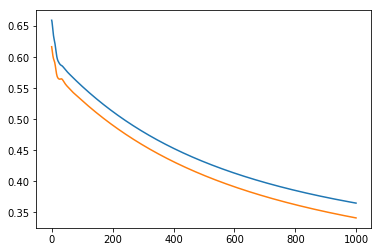

In [187]:
plt.plot(train_loss)
plt.plot(test_loss)
plt.show()

LR score = 0.965323868678


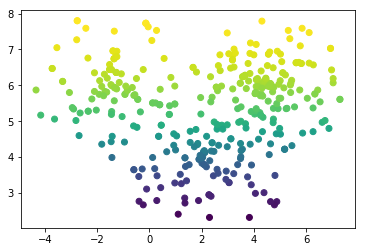

In [189]:
predict, _ = model.forward(X_test, y_test)
print('LR score = ' + str(roc_auc_score(y_test.data.numpy(), predict.data.numpy())))
plt.scatter(X_test[:,0].data.numpy(),X_test[:,1].data.numpy(), c=predict.data.numpy()[:,0])
plt.show()